In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
def to_one_hot(y, num_classes=10):
    return np.eye(num_classes)[y]

# Charger les données MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# cast to np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Prétraitement des données
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train_one_hot = to_one_hot(y_train)

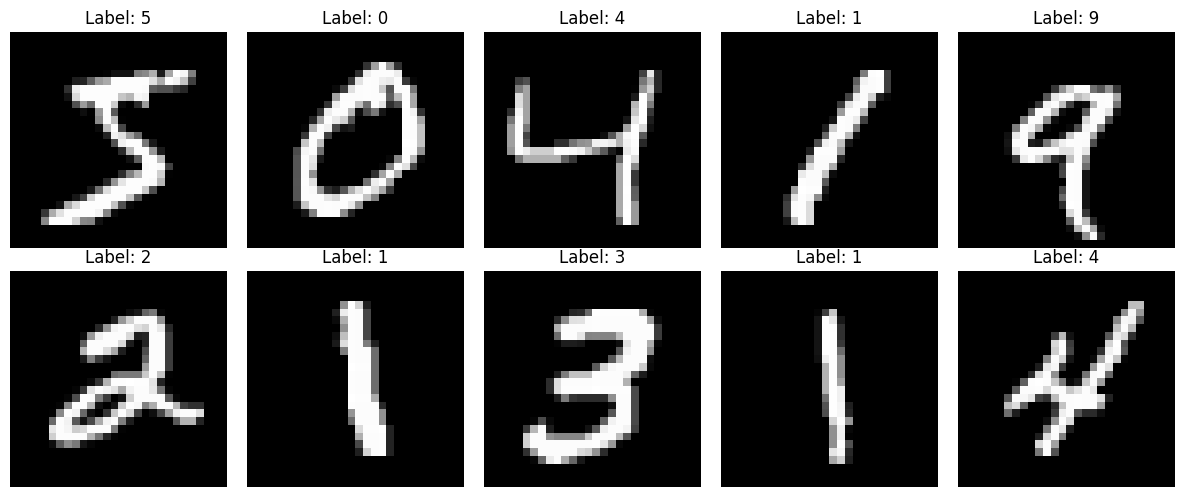

In [3]:
# Visualiser quelques images d'entraînement
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
#Entrainer le modèle
from LeafNetwork import *


nn = LeafNetwork(784)
nn.add(Dense(784, 128))
nn.add(ReLU())
nn.add(Dense(128, 64))
nn.add(ReLU())
nn.add(Dense(64, 10))

import time
start = time.time()
history = nn.train(X_train[:50000], y_train_one_hot[:50000], epochs=20, learning_rate=0.0006)
end = time.time()
print(f"Temps d'entraînement: {end - start:.2f}s")
nn.save("leaf_mnist_model.json")

Epoch: 0 - Error: 0.064879
Epoch: 1 - Error: 0.042203


In [ ]:
plt.plot(nn.error_history)
plt.title('Courbe d\'apprentissage')
plt.xlabel('Epochs')
plt.ylabel('Erreur')
plt.show()

In [ ]:
#load model
last_nn = nn
from LeafNetwork import *
nn = LeafNetwork.load("leaf_mnist_model.json")

In [ ]:
# Tester le réseau
predictions = nn.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_labels == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
import numpy as np
import timeit

def test_accuracy(network, X_test, y_test):
    predictions = network.predict(X_test)
    predicted_labels = np.argmax(predictions, axis=1)
    accuracy = np.mean(predicted_labels == y_test)
    return accuracy

def benchmark_nn():
    return test_accuracy(nn, X_test, y_test)

def benchmark_lastnn():
    return test_accuracy(last_nn, X_test, y_test)

lastnn_time = timeit.timeit(benchmark_lastnn, number=100)
lastnn_accuracy = benchmark_lastnn()

nn_time = timeit.timeit(benchmark_nn, number=100)
nn_accuracy = benchmark_nn()




print(f"Original NN - Test Accuracy: {nn_accuracy:.4f}, Time: {nn_time:.4f} seconds")
print(f"Loaded NN - Test Accuracy: {lastnn_accuracy:.4f}, Time: {lastnn_time:.4f} seconds")

In [ ]:
# Afficher la matrice de confusion
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.savefig('images/confusion_matrix.png')
plt.show()

In [ ]:
# Visualiser quelques prédictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
current_score = 0
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(len(X_test))
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f'Vraie: {y_test[idx]}, Prédite: {predicted_labels[idx]}')
    if y_test[idx] == predicted_labels[idx]:
        current_score += 1
    ax.axis('off')
plt.tight_layout()
# print score
print(f"Score: {current_score}/{len(axes.flat)}")
plt.show()